In [1]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import multiprocess as mp
import os

## Clip Basins

In [2]:
import ee

# Trigger the authentication flow.
#ee.Authenticate()

# Initialize the library.
ee.Initialize()

In [199]:
image =  ee.Image("WWF/HydroSHEDS/03VFDEM")
#bBox = ee.Geometry.BBox(112, -40, 165, -8);
#image = image.clip(bBox)

In [200]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [2]:
import json 
from ee.geometry import Geometry
basin_slopes = gpd.GeoDataFrame()
basin_slopes_t = gpd.GeoDataFrame()

shps = []
for i,row in a.iterrows():
    try:
        sh = list(zip(row.geometry.exterior.coords.xy[0],row.geometry.exterior.coords.xy[1]))
    except:
        sh = list(zip(row.geometry[1].exterior.coords.xy[0],row.geometry[1].exterior.coords.xy[1]))
    shp = Geometry.Polygon(sh)
    shps.append(shp)

NameError: name 'a' is not defined

In [14]:
c = 3147
while c < 4000:
    c+=1
    image = ee.Image("WWF/HydroSHEDS/03VFDEM");
    image = image.clip(shps[c])
    mytask = ee.batch.Export.image.toDrive(image=image, folder='data_earth_engine', description='hydrosheds_bas_v2_'+ str(c))
    mytask.start()

IndexError: list index out of range

In [ ]:
bas =  os.listdir('/Users/gr_1/Google Drive/data_earth_engine')
for i in range(0,3553):
    nm ='hydrosheds_bas_v2_' + str(i) +'.tif'
    if  nm not in bas:
        print(nm)

In [57]:
f = simplem.fs()
f.sinkfill()

In [ ]:
len(ee.batch.Task.list())

In [ ]:
for task in ee.batch.Task.list():
    ee.batch.Task.cancel(task)
    print('here')

## Start running flowacc / chi calc on all basin

In [3]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
eros1 = [None]*3600
eros2 = np.zeros(3600)
slpsall = np.zeros(3600)
slps2 = np.zeros(3600)
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [9]:
nr = 1000
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 1e-8#np.power(10.0,np.random.rand(nr)*-8+-5)
ns = np.random.rand(nr) * 4.0 #np.zeros(nr)+2.7#
ms = ns * .4#np.random.rand(nr)*.5+.1 #np.zeros(nr)+1.0
#concavity = np.random.rand(nr)*.6+.1
diffus =ks * np.power(10.0,np.random.rand(nr)*10)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3)*0+12

In [6]:
nr = 40
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 1e-8# np.power(10.0,np.linspace(-10,-3,nr))
ns = np.zeros(nr) +4
ns = np.array(np.linspace(.2,4,nr)).ravel() #np.zeros(nr)+2.7#
ms = ns * .5#s for s in [.1, .2, .3, .35, .4, .45, .5, .55, .6, .7]]).ravel()  #np.zeros(nr)+1.0
concavity = np.zeros(nr)+.5#np.random.rand(nr)*.6+.1
diffus = 0*ks* np.power(10.0,np.random.rand(nr)*10-1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.zeros(nr)+12#np.zeros(nr)+12#np.power(10.0,np.random.rand(nr)*3)*5

In [7]:
nr = 1
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 0*1e-8# np.power(10.0,np.linspace(-10,-3,nr))
ns = np.array(np.linspace(.2,4,nr)).ravel() #np.zeros(nr)+2.7#
ms = ns * .5#s for s in [.1, .2, .3, .35, .4, .45, .5, .55, .6, .7]]).ravel()  #np.zeros(nr)+1.0
concavity = np.zeros(nr)+.5#np.random.rand(nr)*.6+.1
diffus = np.zeros(nr)+.01#*ks* np.power(10.0,np.random.rand(nr)*10-1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3.69) 

In [8]:
Ed = simplem.diffuse(-100, f.Z, 90, 90,1000)
Ed[Ed<0] = 0


NameError: name 'f' is not defined

In [230]:
#f.sinkfill()
#f.slp_basin()
#f.stack()
#f.acc()

In [234]:
ny,nx = np.shape(f.Z)
F = simplem.erode_other_2(0.00,ny,nx,f.I,f.s,90.0,90.0,0.5,1.0,np.zeros((ny,nx))+1e-6,f.slps,1000.00,f.A,np.zeros((ny,nx)),12.0)

In [235]:
T = Ed+F

T[f.Z<=0] = 0 
L = F# np.divide(F,np.max(T.ravel()))
R = Ed#np.divide(Ed,np.max(T.ravel()))
T = L + R
q = np.quantile(T,.99)

T[f.Z ==0] = np.nan
q

481.4814814759014

In [242]:
nx * 90 / 1e3

330.93

([], [])

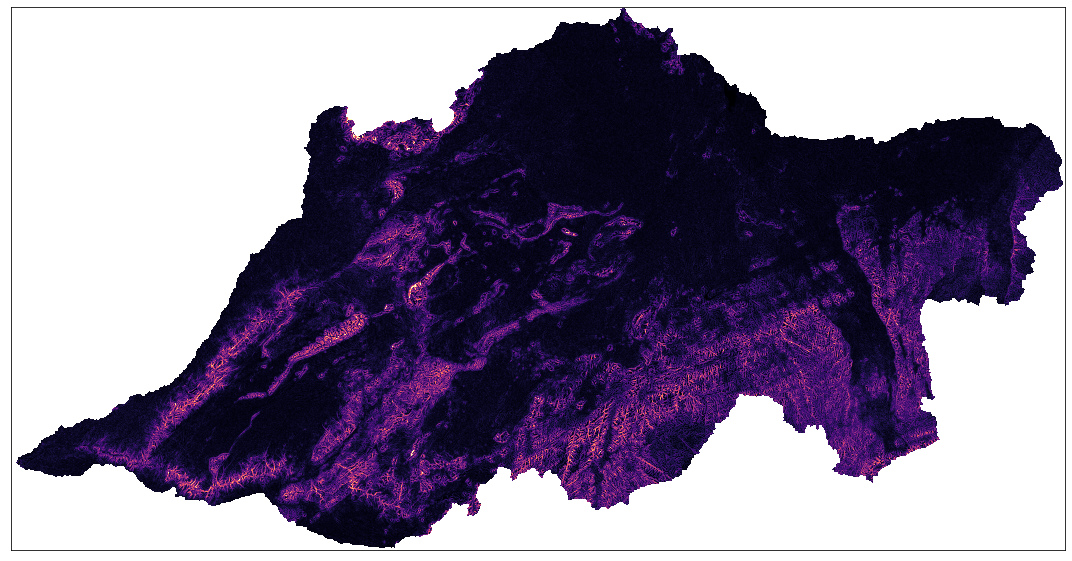

In [238]:
plt.figure(figsize=(20,10))


plt.imshow(T,vmin=0,vmax=q,cmap = 'magma')
plt.xticks([])
plt.yticks([])

#cbar = plt.colorbar(extend='max')
#cbar.ax.tick_params(labelsize=24)

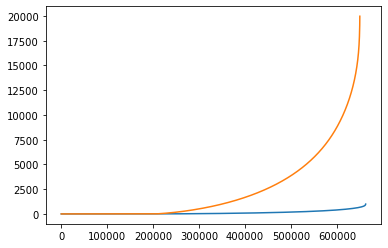

In [95]:
n2 = np.cumsum(np.sort(T[T>0]))
plt.plot(n1)
plt.plot(n2)

In [22]:
z = f.Z.copy()
z[f.Z = 0] = np.nan

SyntaxError: invalid syntax (<ipython-input-22-cc4c605d795f>, line 2)

In [23]:
plt.hist(T.ravel(),1000,[0,.01,.02,.03])

NameError: name 'T' is not defined

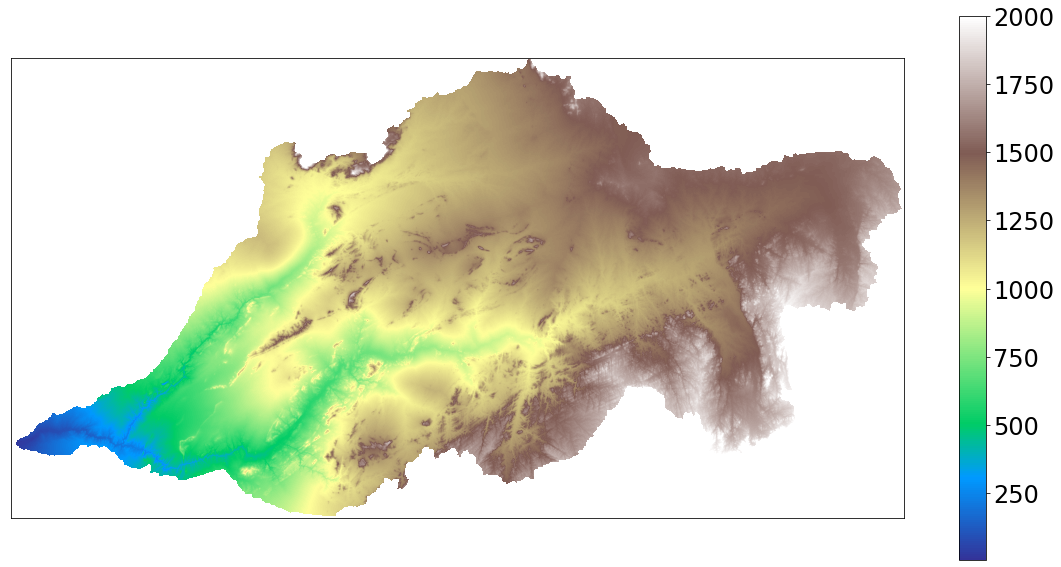

In [55]:
plt.figure(figsize=(20,10))
plt.imshow(z,cmap = 'terrain',vmax=2000)
plt.xticks([])
plt.yticks([])

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=24)

In [6]:

n = 3553
def do_ero(i):
    k1[k1>0] = ks[i]
    E = simplem.diffuse(-diffus[i],Zi,dy1,dx1,1)
    plt.imshow(Zi)
    plt.show()
    E[E<0] = 0
    m = ms[i]
    n = ns[i]
    #E[A1<careas[i]] = 0
    ero = simplem.erode_other_2(Gs[i],ny1,nx1,I1,s1,dx1,dy1,ms[i],ns[i],k1,slps1,dt1,A1,E,careas[i])
    A = simplem.acc(ero.copy(), ny1, nx1, I1, s1)
    print(np.mean(E[Zi>0]))
   # print(np.sort(A1.ravel()))
    pl =(A.ravel()[np.argmax(A1.ravel())])/np.max(A1.ravel())
    return pl, i
nfail = 0
for c in range(1,n):
   # try:
        print(c)

        dem = rasterio.open('/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v2_{}.tif'.format(str(c)))
        lat = dem.xy(0,0)[1]
        dx = np.cos(lat/180*np.pi) * (1852/60) * 3
        f = simplem.fs()
        f.dx = dx
        f.dy = 92.59


        f.set_z(np.pad(np.float64(np.squeeze(dem.read())), pad_width=2))

        f.BC = np.where(f.Z.transpose().ravel()<=0)[0]

        f.slp_basin()
        slpx= f.slps.copy()
        if c == 4:
            break

        f.k[:,:] = 1e-6
        f.k[f.Z == 0] = 0

        f.sinkfill()
        f.slp_basin()

        #f.slp_mn()
        slps = f.slps.copy()

        f.dt = 1000
        f.stack()
        f.acc()
        Zi = f.Z.copy()
        A1=f.A.copy()

        ero = f.erode_other()
        #f.slp_mn()

       # slps[slps>1]= 0
        #f.slp()
        mnmat = np.zeros((len(ms),1))
        if 1:
            k1 = f.k.copy()

            A1 = f.A.copy()
            ny1 = f.ny
            nx1 = f.nx
            I1 = f.I.copy()
            slps1 = f.slps.copy()
            s1 = f.s
            dt1 = f.dt
            dy1 =f.dy
            dx1 = f.dx
            with mp.Pool(6) as p:
                vals = p.map(do_ero,[i for i in range(len(ns))])

        eros1[c] = mnmat[ list(zip(*vals))[1],0] =  list(zip(*vals))[0]
        #fig,ax = plt.subplots(figsize=(5,5))
        #plt.imshow(vals[0][2])
        #eros1[c] = (f.A.ravel()[f.Z.ravel()>0][np.argmax(A.ravel()[f.Z.ravel() > 0])])/np.max(A.ravel()[f.Z.ravel()>0])
        #A2 = simplem.acc(slpx, ny1,nx1,I1,s1)
        #slpsall[c] = (A2.ravel()[np.argmax(A1.ravel())])/np.max(A1.ravel())

        #slps1[c] = np.mean(np.logical_and(slps[f.Z>0]))

      #  f.slp_mn()

       # slps = f.slps.copy()
      #  f.slp()
       # slps[slps>1] = 0
        f.acc(slps)
        slps2[c] = (f.A.ravel()[f.Z.ravel()>0][np.argmax(A1.ravel()[f.Z.ravel() > 0])])/np.max(A1.ravel()[f.Z.ravel()>0])

       # print(np.mean(f.slps.ravel()[A.ravel()>1]))
       # print(f.A.ravel()[np.argmax(A.ravel())]/np.max(A.ravel()))
        #print(np.sum(slps.ravel()[np.logical_and(f.Z.ravel()>1,f.slps.ravel()<1)]))
       # print(max(f.A.ravel()))#[np.argmax(A.ravel())])
    
    #except Exception as e:
       # print('fail' + str(c))
        #print(e)
       # po=1
       # nfail+=1
                      

1
193791
164883
0.0045011859314124675
2
114444
106652
0.0052510694897507015
3
3481530
3258808
0.005838834952128193
4
1264240


In [98]:
1834386 / 3619258

0.5068403523595167

In [58]:
d=simplem.diffuse(.01, f.Z, 90, 75, 1000)
np.mean(d[d>0])

0.032923536343182645

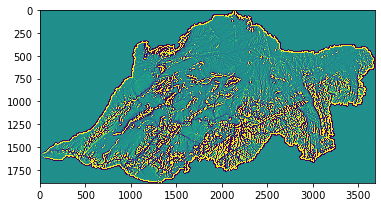

In [47]:
plt.imshow(d,vmin=-.001,vmax=.001)

In [116]:
slps.ravel()[np.argmax(vals[0][2].ravel())]

0.41869696779154963

(0.001, 1.0)

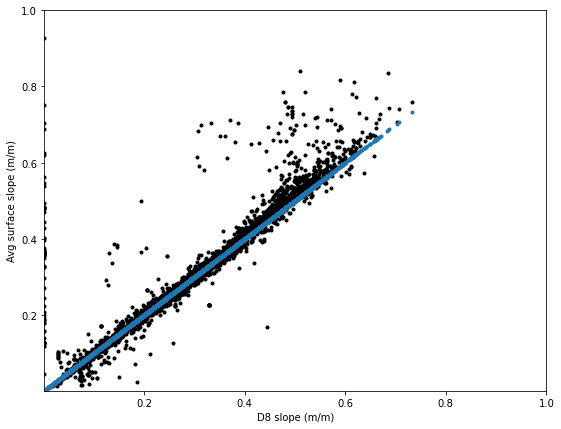

In [15]:
fig,ax = plt.subplots(figsize=(9,7))

plt.plot(slps2[:len(a)],a['slp_ave']/1000,'k.')
plt.plot(slps2,slps2,'.')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('D8 slope (m/m)')
plt.ylabel('Avg surface slope (m/m)')
plt.xlim([10**-3, 10**0])
plt.ylim([10**-3, 10**0])

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))

plt.plot(slpsall[:len(a)],a['ebe_mmkyr']/1000,'k.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 slope (m/m)')
plt.ylabel('Observed erosion rate (mm/kyr)')

In [ ]:
plt.plot(np.log10(ks2),r2s,'.')
ro = np.where(r2s>.01)[0][5]
plt.plot(dfs[ro][:len(a)],a['ebe_mmkyr'], '.')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'count')

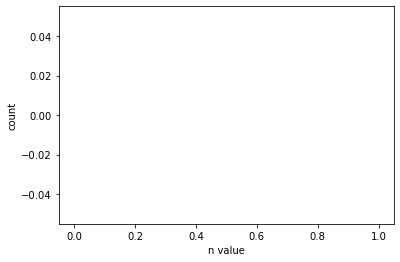

In [185]:
plt.hist(np.log10(diffus[r2s<3.4]))
plt.xlabel('n value')
plt.ylabel('count')

In [27]:
plt.plot(dfs[np.argmax(r2s)],a['ebe_mmkyr'],'.')

NameError: name 'dfs' is not defined

In [10]:
plt.plot((ns),r2s,'.')
ns[np.argmax(r2s)]

NameError: name 'r2s' is not defined

In [ ]:
plt.plot((ns),r2s,'.')
ns[np.argmax(r2s)]

In [53]:
ls = gpd.read_file('/Users/gr_1/Downloads/River_basin_num2/River_basin_num2.shp')
#ls.Volume.sum()*1e2*2700/1e9

In [54]:
ls.to_file('/Users/gr_1/Downloads/river_bsn')

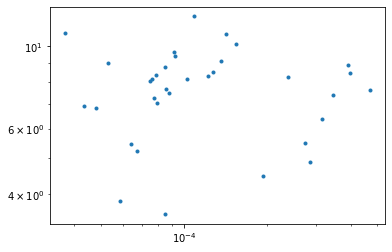

In [163]:
len(np.where(a['ebe_mmkyr'] ==0)[0])

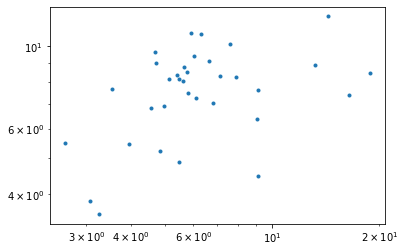

In [15]:
plt.plot(dfs[4][:35],a['ebe_mmkyr'][:35],'.')
plt.xscale('log')
plt.yscale('log')

In [81]:
dfs[1][:37]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [44]:
#plt.plot(dfs[10,0],a['ebe_mmkyr'],'.')
#plt.xscale('log')
#plt.yscale('log')
#np.save('ers_diffu+sp',eros1)
#a= plt.plot(ks,r2s[:,0],'.')
#plt.xscale('log')
#plt.hist(concavities)
plt.plot(diffus[r2s>.15]),bins=10)


[autoreload of simplem_par failed: Traceback (most recent call last):
  File "/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 790, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/gr_1/Documents/simplem/simplem_par.py", line 121, in <module>
    class fs:
  File "/Users/gr_1/Documents/simplem/si

SyntaxError: cannot assign to function call (<ipython-input-44-c3338ce9b13d>, line 8)

In [10]:
folder = 'results/r_mnA_1'
if 1:
    np.save('{}/eros'.format(folder),eros1)
    np.save('{}/diffu'.format(folder),diffus)
    np.save('{}/ms'.format(folder),ms)
    np.save('{}/ns'.format(folder),ns)
    np.save('{}/ks'.format(folder),ks)
    np.save('{}/careas'.format(folder),careas)
    np.save('{}/Gs'.format(folder),Gs)
    np.save('{}/careas'.format(folder),careas)
    np.save('{}/slps2'.format(folder),slps2)
    

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [164]:
eros1 = np.load('r_sole/eros.npy',allow_pickle=True)

In [18]:
    np.save('{}/slps2'.format(folder),slps2)


In [222]:
#eros2 = np.load('eros_with_diffusion-var_hills.npy',allow_pickle=True)
folder = 'results/r_G_1'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

In [192]:
for i in range(1,len(eros1)):
    if eros1[i] is None:
        continue
    else:
        eros1[i] = np.concatenate([eros1[i],eros2[i]])

ValueError: x and y must have same first dimension, but have shapes (19, 41) and (3553,)

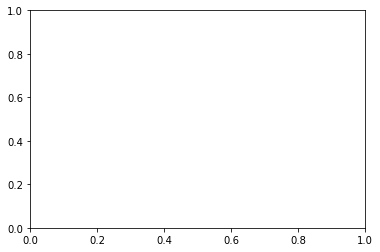

In [17]:
plt.plot(slpsa[:len(a)],a['slp_ave']/1000,'.')
plt.plot(np.arange(1e-2,1.0,1e-2),np.arange(1e-2,1.0,1e-2),'.')
plt.yscale('log')
plt.xscale('log')

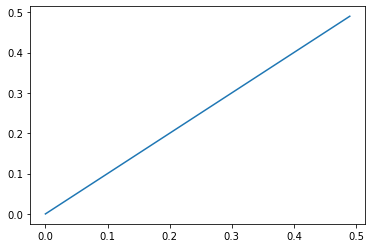

In [135]:
plt.plot(np.arange(0,.5,.01),np.arange(0,.5,.01))

In [8]:
np.a['slps1'] = slps1[:len(a)]

In [9]:
np.from sklearn import linear_model

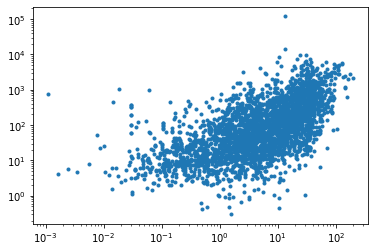

In [63]:
plt.plot(dfs[0][:len(a)], a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
eros1[1:]*=1000000

## Begin other thing

In [223]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
            

In [228]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
ks2 = ks.copy()
diffus2 = diffus.copy()
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>n-500:
                print(len(x[np.logical_not(np.isnan(x))]))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                y2 = p.predict(x.reshape(-1,1))
                y3 = x * p.coef_
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = np.mean(np.power(y-y3,2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p.coef_


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3194
3194
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3193
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3194
3194
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3193
3193
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3194
3194
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3193
3193
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3194
3194
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192
3192


<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-228-f073d45b3e13>:13: RuntimeWarning: divide by z

Text(0, 0.5, 'r2')

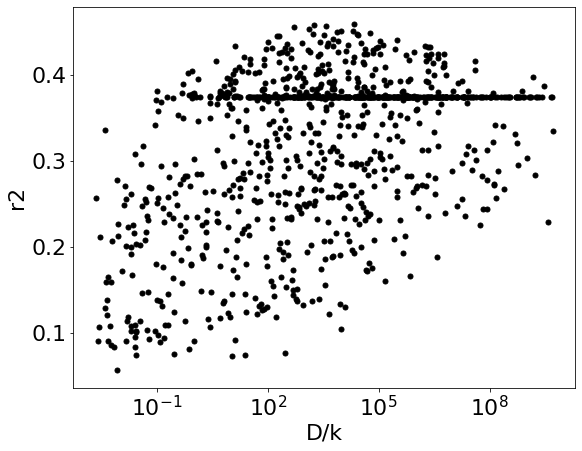

In [277]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((diffus/ks),r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('D/k')
plt.ylabel('r2')


Text(0, 0.5, 'r2')

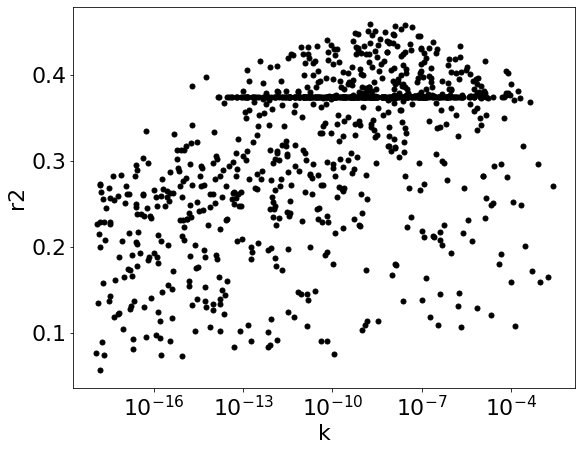

In [285]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((ks2),r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('r2')


Text(0, 0.5, 'run count')

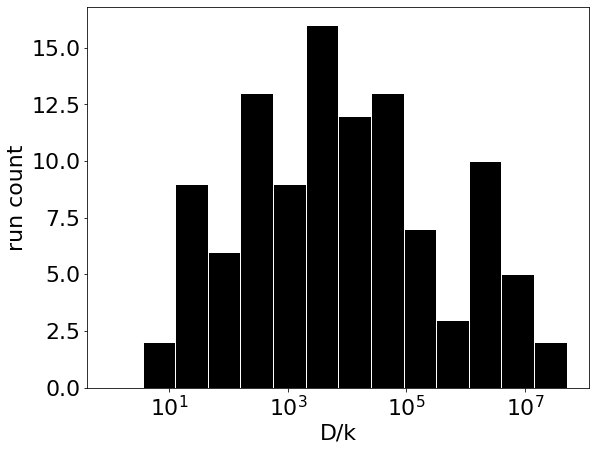

In [289]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist(np.divide(diffus[r2s>.4],ks[r2s>.4]),edgecolor='w',color='k',bins = np.power(10.0,np.arange(0,8,.55)))
plt.xscale('log')
plt.xlabel('D/k')
plt.ylabel('run count')

In [259]:
np.power(10,np.arange(-10,-4))

ValueError: Integers to negative integer powers are not allowed.

Text(0, 0.5, 'run count')

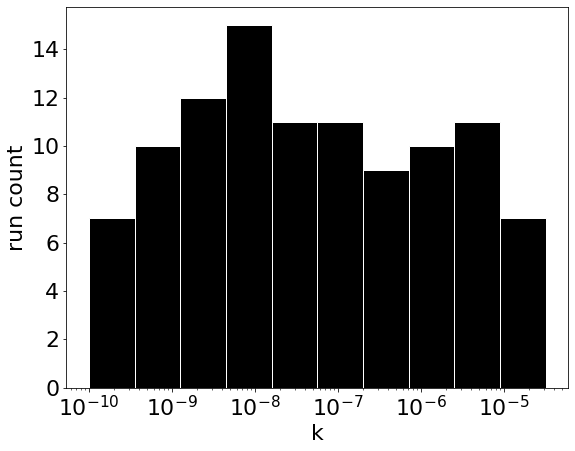

In [270]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist((ks[r2s>.4]),edgecolor='w',color='k',bins = np.power(10.0,np.arange(-10,-4,.55)))
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('run count')

Text(0, 0.5, 'r2')

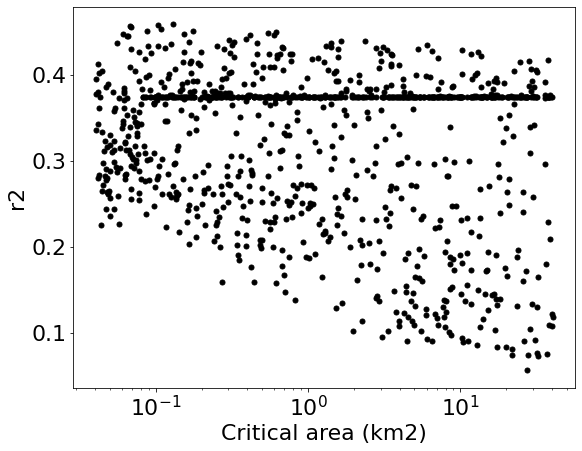

In [293]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((careas)*90**2/1e6,r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('Critical area (km2)')
plt.ylabel('r2')


Text(0, 0.5, 'run count')

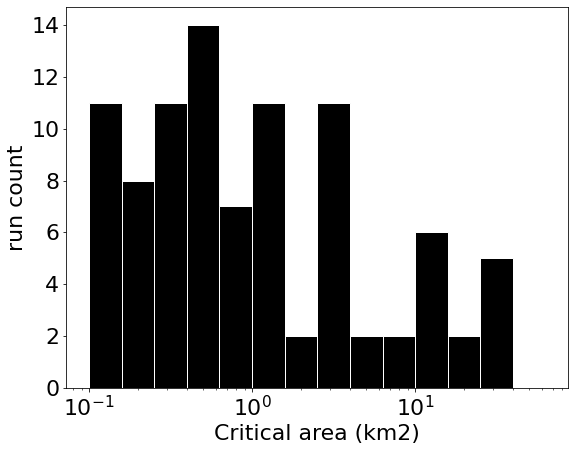

In [304]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist(careas[r2s>.4]*90**2/1e6,edgecolor='w',color='k',bins = np.power(10.0,np.arange(-1,2,.2)))
plt.xscale('log')
plt.xlabel('Critical area (km2)')
plt.ylabel('run count')

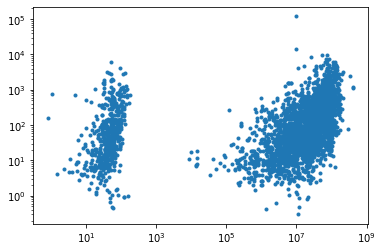

In [122]:
#plt.hist(plt.plot(diffus[r2s>.4]))
#plt.plot(dfs[np.argmax(r2s)][:len(a)],a['ebe_mmkyr'],'.')


In [15]:
ks

array([1.35171591e-05, 2.47521956e-04, 8.90428269e-08, 4.44249167e-06,
       3.04726137e-03, 1.07334156e-04, 1.22966890e-05, 7.73824977e-05,
       2.22489836e-09, 3.70245556e-03, 7.16858240e-07, 5.63449033e-08])

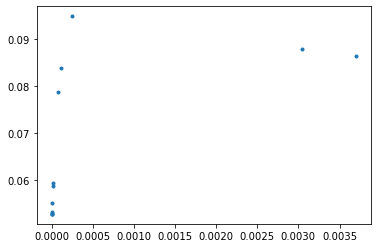

In [14]:
plt.plot(ks,r2s,'.')
#plt.xscale('log')
#plt.yscale('log')

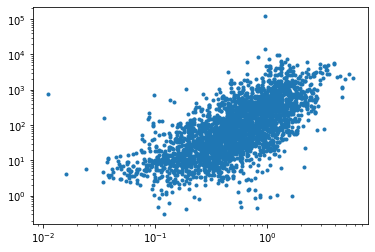

In [33]:
plt.plot(dfs[966][:len(a)],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [13]:
Gs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
np.argmin(np.abs(ns-1.9286))

126

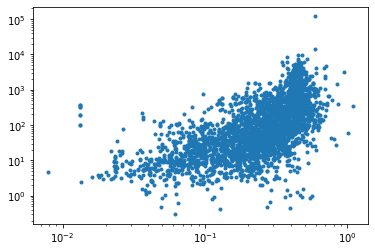

In [54]:
plt.plot(slpsall[:len(a)],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')
#plt.plot(np.log(dfs[np.argmax(a)]))

In [52]:
diffus[np.argmax(r2s)]

3.804728305633972e-05

In [ ]:
# from sklearn import linear_model as lm
# import sklearn
# r2s = np.zeros((len(ms),len(ns)))
# for i in range(20):#range(len(ms)):
#     for j in range(16):#range(len(ns)):
#         if dfs[i,j] is None:
#             continue
    
#         y = np.log(np.float64(a['ebe_mmkyr'])/1000)
#         x = np.log(dfs[i,j])
#         I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#         x=x[I_min]
#         y=y[I_min]
#         xi = x.copy()
#         I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
#         x=np.delete(x,I)
#         y=np.delete(y,I)
#         I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
#         x = np.delete(x,I2)
#         y = np.delete(y,I2)
#         l  = lm.LinearRegression()
#         if (len(x)==0) or (len(y)==0):
#             continue
#         p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
#         y2 = p.predict(x.reshape(-1,1))
#         r2s[i,j]=sklearn.metrics.r2_score(y.reshape(-1,1),y2)


(array([228.,  16.,  13.,  16.,  14.,   7.,   3.,   3.,   4.,   4.]),
 array([1.13918299e-07, 9.13308192e-02, 1.82661524e-01, 2.73992230e-01,
        3.65322935e-01, 4.56653640e-01, 5.47984346e-01, 6.39315051e-01,
        7.30645756e-01, 8.21976461e-01, 9.13307167e-01]),
 <BarContainer object of 10 artists>)

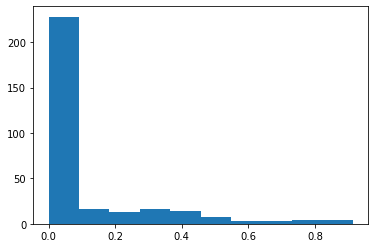

In [84]:
plt.hist(diffus[np.logical_and(r2s<.38,r2s>.36)])

In [15]:
a['ksn'] = a['ebe_mmkyr'].to_numpy()/dfs[4,5][:len(a)]
a.to_file('octo_327_data/')
plt.plot(a['ksn'],a['ebe_mmkyr'],'.')
plt.yscale('log')
plt.xscale('log')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [73]:
plt.plot(dfs[4,10],a['ebe_mmkyr'],'.')
plt.yscale('log')
plt.xscale('log')
plt.xlim([10e-11,10e-5])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

0.31561967388953904

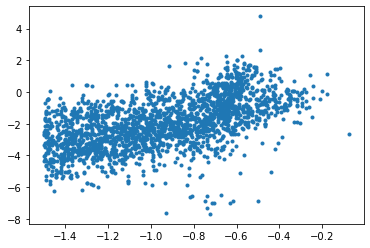

In [13]:
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(np.float64(a['slp_ave'][:n]/1000))
I0 = np.where(x<-1.5)[0]
xi = x.copy()
x = np.delete(x,I0)
y = np.delete(y,I0)
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
x = np.delete(x,I2)
y = np.delete(y,I2)
l  = lm.LinearRegression()
p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = p.predict(x.reshape(-1,1))
plt.plot(x,y,'.')
sklearn.metrics.r2_score(y.reshape(-1,1),y2)


ValueError: x and y must have same first dimension, but have shapes (19, 41) and (3553,)

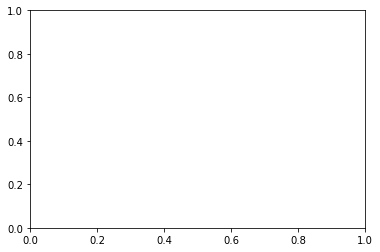

In [72]:
plt.plot(slps1,a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(np.float64(a['slps1']))
xi = x.copy()
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
x = np.delete(x,I2)
y = np.delete(y,I2)
l  = lm.LinearRegression()
p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = p.predict(x.reshape(-1,1))
sklearn.metrics.r2_score(y.reshape(-1,1),y2)

In [15]:
#ax=plt.plot(eros1[:len(a)],a['ebe_gcmyr']/1000,'.')
slps_ = slps1
slps_[slps_<1e-6] = np.nan
ax=plt.plot(eros1[len(a)],a['ebe_gcmyr'][/1000,'.')
plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-2, 1])
#plt.ylim([1e-2, 1])

#a['ebe_gcmyr'][a['erorate_est']<=0] = np.nan

SyntaxError: invalid syntax (<ipython-input-15-e6381bda8298>, line 4)

In [20]:
r2s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
from sklearn import linear_model as lm
ax=plt.plot(slps1[1:3500],np.float64(a['ebe_mmkyr'][1:3500])/1000,'.')
erate = np.float64(a['ebe_mmkyr'][1:n])/1000
slps1 = slps1[1:n]
I = np.where(slps1 ==0)
np.delete(slps1,I)
slps1 = erate = np.delete(erate,I)
I2 = np.where(np.isnan(erate))
slps1 = np.delete(slps1,I2)
erate = np.delete(erate,I2)
l  = lm.LinearRegression()
l.fit(slps1.reshape(-1,1),erate.reshape(-1,1))
plt.yscale('log')
plt.xscale('log')

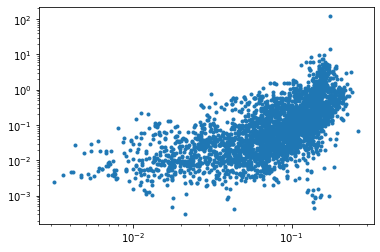

In [47]:
ax=plt.plot(np.float64(a['slp_ave'][1:3500]/3500),np.float64(a['ebe_mmkyr'][1:3500])/1000,'.')
plt.yscale('log')
plt.xscale('log')

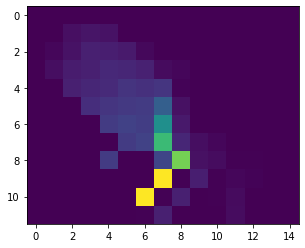

In [109]:
plt.imshow(f.A)

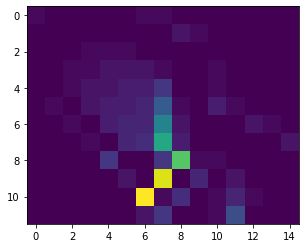

In [114]:
plt.imshow(A)

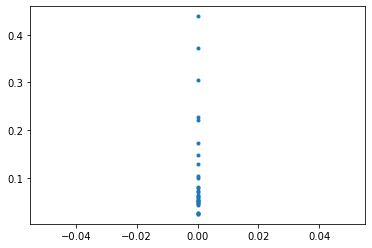

In [40]:
#ax=plt.plot(eros1[:len(a)],a['ebe_gcmyr']/1000,'.')
#ax=plt.plot(slps1[:len(a)],a['slp_ave'],'.')
ax=plt.plot(eros1[:30],np.float64(a['slp_ave'][:30])/1000,'.')

#plt.yscale('log')
#plt.xscale('log')
#plt.xlim([5e-4, 1])

In [119]:
np.argmax(np.abs(slps1[1:30] - np.float64(a['slp_ave'][1:30])))

28

NameError: name 'dfs' is not defined

In [ ]:
import seaborn as sns

In [ ]:
a.columns

Rearrange Section 3 so that it starts with the measurements and then describes how we analyzed them.  Expand it paragraph by paragraph as follows.

3.0.  Measurements of Q and C.  The second paragraph of what is now Section 3.1 is a good start.  Expand the text so that it includes more information about how the measurements were made and where the data are stored so that readers could find the data if they want to.  Paragraphs:
- TWRA measurement history and protocols
- Characteristics of Q and C data (gaps, frequency, etc.)
- We analyzed data from X rivers.  Explain why we chose those rivers.

3.1.  Rating curve background.  Paragraphs:
- What is a rating curve?  Show Equation 1.
- RCs are useful for improving estimates of Q_s
- We used MVUE to estimate a and b.  Explain why we chose this method.
- We centered log(Q) to avoid correlation of a and b
- We applied a correction for log retransformation bias.

3.2.  Rating curve application.  Paragraphs:
- We used the method in Section 3.1 to get daily C and Q_s.  Different rating curves each year.
- We calculated annual Q_s from daily Q_s.  Describe how we dealt with gaps.
- We calculated erosion rates from Q_s.
- How we dealt with nested basins.

3.3.  Landslide volumes generated by Morakot.  Paragraphs:
- We use landslide volumes reported in Marc et al. (2018)
- We calculated basin-total landslide volumes from that inventory.